In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from kneed import DataGenerator, KneeLocator 

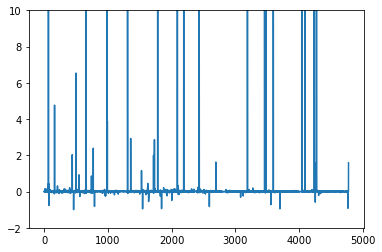

In [2]:
data = pd.read_csv("6.csv") 
price1=np.zeros(4779)
price2=np.zeros(4779)
price1=data['Price 01/16/2018'].values
price2=data['Price 01/17/2018'].values
pricechange=(price2-price1)/price1
pricechange.shape
x=np.arange(4779)
plt.plot(x,pricechange)
plt.ylim(-2,10)
plt.show()

67 25.349999999999994
656 14.166666666666666
989 21.35714285714286
1309 35.19047619047619
1782 23.365853658536587
2091 27473.999999999996
2191 11.085714285714287
2434 10.049250535331906
3191 5991.499999999999
3460 7223.999999999999
3483 2095.0
3597 249.00000000000003
4048 180.48148148148147
4098 110.37037037037037
4240 24898.999999999996
4275 695.4285714285714


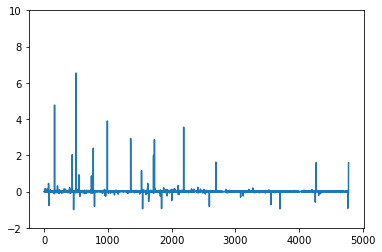

In [3]:
for i in range(4779):
    if pricechange[i]>10:
        print(i,pricechange[i])
        pricechange[i]=0
plt.plot(x,pricechange)
plt.ylim(-2,10)
plt.show()

In [4]:
cluster_distance=[]
clusters=[]
for k in range(13,50): #try to find the elbow point 
    price3index=np.zeros((4779,2))  #2*4779 table 
    center=(np.random.rand(k)-0.5)*0.1  #random choose centers 
    total=0
    for j in range(100):     #iteration
        for i in range(4779):
            distance=np.abs(pricechange[i]-center)  #distance between each center to each point
            price3index[i]=[np.argmin(distance),np.min(distance)]   #index and shortest distance
        count=np.zeros((k,2))
        for i in range(4779):
            count[int(price3index[i][0])][0]+=1  #how many stocks in each cluster 
            count[int(price3index[i][0])][1]+=pricechange[i]   #sum of distance in each cluster
            center=count[:,1]/(count[:,0]+1e-9)  #new centers

    for i in range(4779):
        total=total+price3index[i][1] #shortest total distance of each point to its center point
    print('cluster number:',k,'total distance',total)
    cluster_distance.append(total)
    clusters.append(k)

cluster number: 13 total distance 34.194210218685484
cluster number: 14 total distance 30.266523970134216
cluster number: 15 total distance 28.96815139916671
cluster number: 16 total distance 28.143612541968608
cluster number: 17 total distance 25.67220758011816
cluster number: 18 total distance 25.794901966035276
cluster number: 19 total distance 24.70538260901774
cluster number: 20 total distance 23.676679231270732
cluster number: 21 total distance 21.851974048538356
cluster number: 22 total distance 20.490970885792276
cluster number: 23 total distance 19.28559493360699
cluster number: 24 total distance 18.902733070233975
cluster number: 25 total distance 18.555267953834736
cluster number: 26 total distance 17.57291980167854
cluster number: 27 total distance 17.299227565431064
cluster number: 28 total distance 17.8513097422463
cluster number: 29 total distance 16.279378348416643
cluster number: 30 total distance 15.934746056768324
cluster number: 31 total distance 16.67846605048493
c

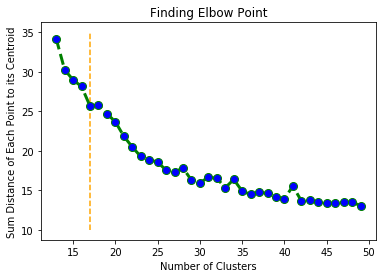

In [10]:
fig=plt.figure()
x=clusters
y=cluster_distance

kn=KneeLocator(x, y, curve='convex', direction='decreasing')


plt.plot(x, y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8)

plt.vlines(kn.knee,10, 35,linestyles='dashed',color='orange')

# naming the x axis 
plt.xlabel('Number of Clusters') 
# naming the y axis 
plt.ylabel('Sum Distance of Each Point to its Centroid') 
  
# giving a title to my graph 
plt.title('Finding Elbow Point') 
  
# function to show the plot 
plt.show()

In [11]:
kn.knee #number of clusters

17

In [13]:
fig.savefig('6 Jane17 2018.png')